# PS2#11 - Lasso Regularization

The goal of this notebook is to illustrate Lasso regularization, and to highlight its differences with Ridge regression.

In [9]:
import numpy as np
import pandas as pd
import sklearn.linear_model
import matplotlib.pyplot as plt

np.random.seed(0)

Let us consider a simple polynomial regression problem where we want to fit the following function $f(x) = x$:

In [10]:
def f(x):
    return x

Importantly, we do not have access to $f$, but only to noisy samples:

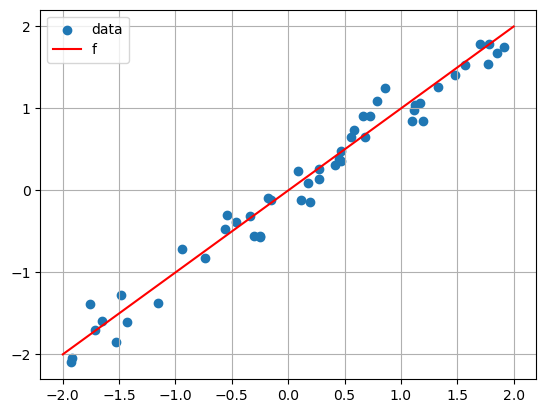

In [11]:
N = 50
X_plot = np.linspace(-2, 2, 1001)
X = np.random.uniform(-2, 2, N)
Y = f(X) + np.random.normal(0, 0.2, size=N)
plt.scatter(X, Y, label='data')
plt.plot(X_plot, f(X_plot), label='f', color='red')
plt.legend(loc='best')
_=plt.grid(True)

We perform polynomial linear regression. We begin by computing the feature matrix:

In [12]:
def polynomial_features(X, M):
    return np.vstack([
        X**k for k in range(M+1)
    ]).T

(50, 9) (1001, 9)


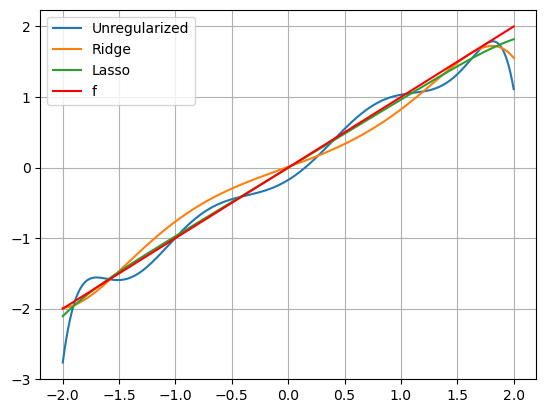

In [13]:
M = 8
features = polynomial_features(X, M)
plot_features = polynomial_features(X_plot, M)
print(features.shape, plot_features.shape)

# fit_intercept controls whether the LinearRegression adds a bias term
# We don't need one, since it's already in our features
unregularized = sklearn.linear_model.LinearRegression(fit_intercept=False)  
ridge = sklearn.linear_model.Ridge(fit_intercept=False, alpha = 5)
lasso = sklearn.linear_model.Lasso(fit_intercept=False, alpha = 0.01, max_iter=100000)
models = {'Unregularized': unregularized, 'Ridge': ridge, 'Lasso': lasso}

for name, model in models.items():
    model.fit(features, Y)
    plt.plot(X_plot, model.predict(plot_features).squeeze(), label=name)
plt.plot(X_plot, f(X_plot), label='f', color='red')
plt.legend(loc='best')
plt.grid(True)

We can plot the magnitude of the weigths for each model:

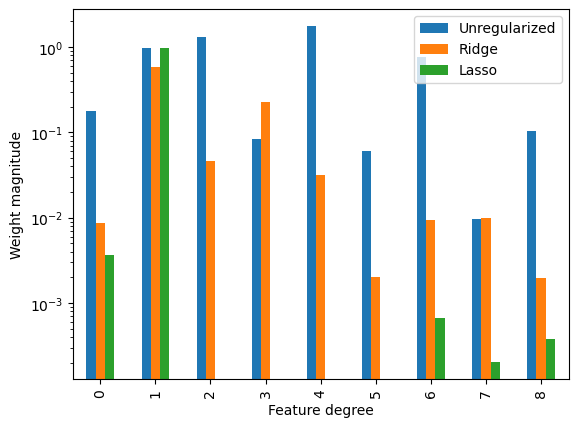

In [14]:
df = pd.DataFrame({n:m.coef_ for n,m in models.items()})
np.abs(df).plot.bar(logy=True)
plt.ylabel('Weight magnitude')
_=plt.xlabel('Feature degree')

Let's see how the value of the weights of Lasso regularization evolve as the regularizer increases, and compare this to Ridge regularization.

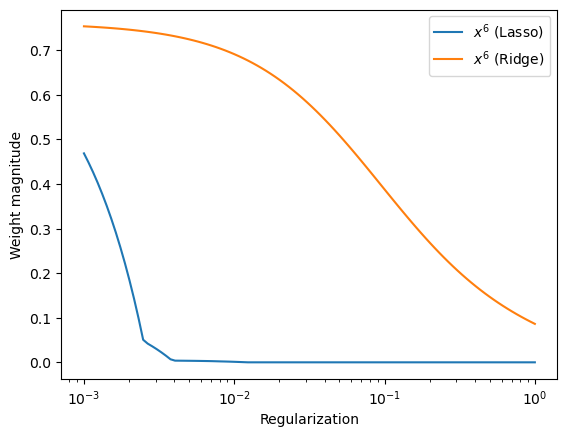

In [15]:
regularizers = np.array([10**k for k in np.linspace(-3, 0, 100)])
weights_lasso = np.zeros((regularizers.shape[0], M+1))
weights_ridge = np.zeros((regularizers.shape[0], M+1))

for n, reg in enumerate(regularizers):
    mdl_lasso = sklearn.linear_model.Lasso(alpha=reg, max_iter=100000)
    mdl_lasso.fit(features, Y)
    weights_lasso[n, :] = mdl_lasso.coef_
    mdl_ridge = sklearn.linear_model.Ridge(alpha=reg)
    mdl_ridge.fit(features, Y)
    weights_ridge[n, :] = mdl_ridge.coef_

labels = [f'$x^{m}$ (Lasso)' for m in range(M+1)] + [f'$x^{m}$ (Ridge)' for m in range(M+1)]
ridge_start_index = M+1
m=6
df = pd.DataFrame(data=np.hstack((weights_lasso, weights_ridge)), columns=labels, index=pd.Series(regularizers))
_=np.abs(df.loc[:, [labels[m], labels[ridge_start_index + m]]]).plot(logx=True)
plt.xlabel('Regularization')
_=plt.ylabel('Weight magnitude')

Lasso performs **feature selection**; the model it outputs is sparse.

However, it is not ideal: as we see below, for large values of the regularization coefficient, Lasso does not know which odd power of $x$ to use for prediction.
In general, Lasso is not very robust against correlation between features.

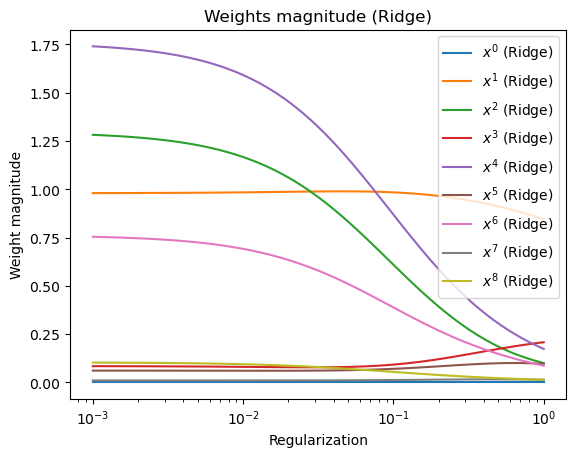

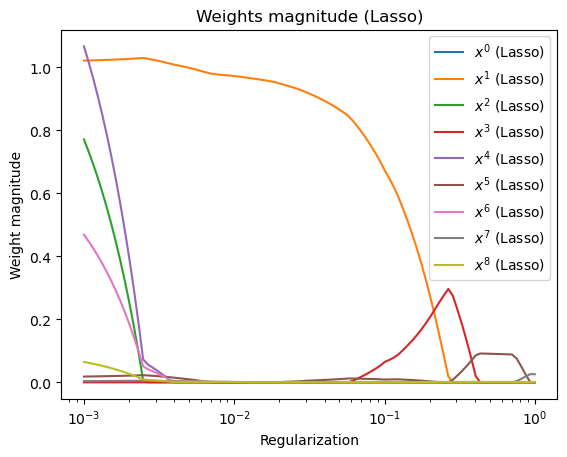

In [16]:
np.abs(df.loc[:, labels[ridge_start_index:]]).plot(logx=True)
plt.title('Weights magnitude (Ridge)')
plt.xlabel('Regularization')
_=plt.ylabel('Weight magnitude')
np.abs(df.loc[:, labels[:ridge_start_index]]).plot(logx=True)
_=plt.title('Weights magnitude (Lasso)')
plt.xlabel('Regularization')
_=plt.ylabel('Weight magnitude')